# install all packages you need

In [1]:
rm(list = ls())

ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

packages <- c('tidyverse', 'fpp2', 'readr', 'dplyr', 'xts', 'ggplot2','astsa')

ipak(packages)

Loading required package: tidyverse

── Attaching packages ───────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: fpp2

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ──────────────────────────────────────────────────── fpp2 2.4 ──

✔ forecast  8.15     ✔ expsmooth 2.3 
✔ fma       2.4      

Warning message:
“package ‘fma’ was built under R version 4.1.1”


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following 

tidyverse      fpp2     readr     dplyr       xts   ggplot2     astsa 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE

# load packages and data

In [2]:
library(tidyverse)
library(fpp2)
library(readr)
library(dplyr)
library(astsa)
library(xts)
library(ggplot2)

In [3]:
data <- read_csv("~/Data/Dropbox/Working_Directory/Tex_MD/Teaching/tutorial/6003/W2/airline.csv")

Rows: 192 Columns: 3

── Column specification ──────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): year, month, miles


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
colnames(data)

[1] "year"  "month" "miles"

# b

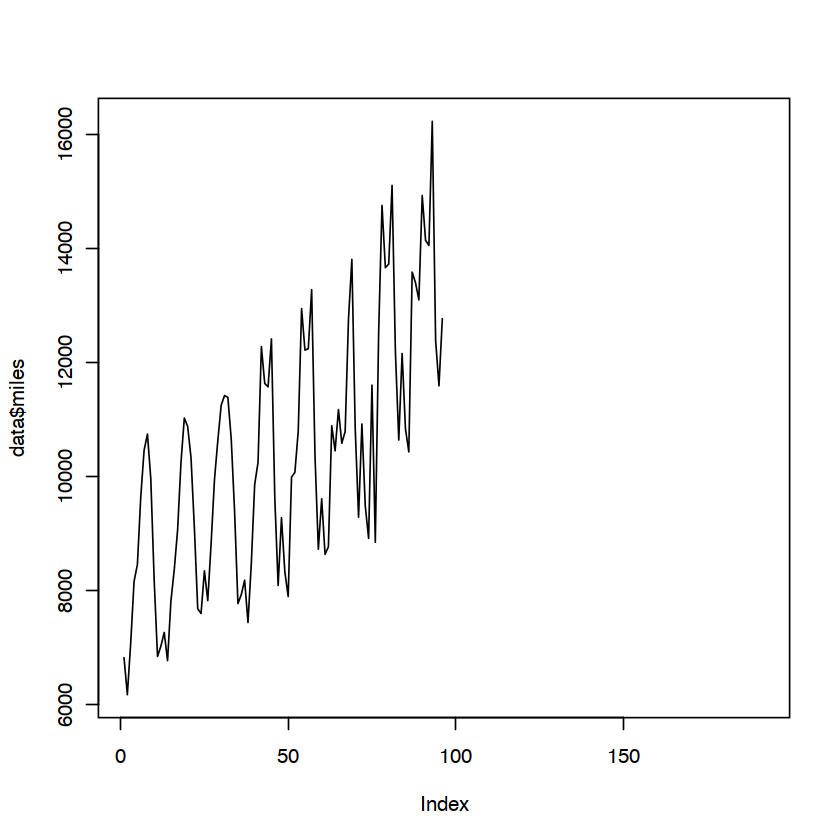

In [5]:
plot(data$miles, type="l")

In [6]:
summary(data$miles)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   6178    8600   10401   10386   11768   16234      96 

In [7]:
data1 = data[data[, "year"] <= 1967,]
summary(data1$miles)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6178    8054    9505    9448   10686   13281 

# c

In [8]:
data$trend = 1:nrow(data)
model1 = lm(miles ~ trend, data=data)
summary(model1)


Call:
lm(formula = miles ~ trend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3029.8 -1342.8  -199.4  1449.9  3427.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7747.174    330.542  23.438  < 2e-16 ***
trend         54.403      5.917   9.194 9.53e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1607 on 94 degrees of freedom
  (96 observations deleted due to missingness)
Multiple R-squared:  0.4735,	Adjusted R-squared:  0.4679 
F-statistic: 84.52 on 1 and 94 DF,  p-value: 9.528e-15


In [9]:
data$yhat = predict(model1, data)
data$ehat = data$miles - data$yhat

Warning message:
“Removed 96 row(s) containing missing values (geom_path).”
Warning message:
“Removed 96 row(s) containing missing values (geom_path).”


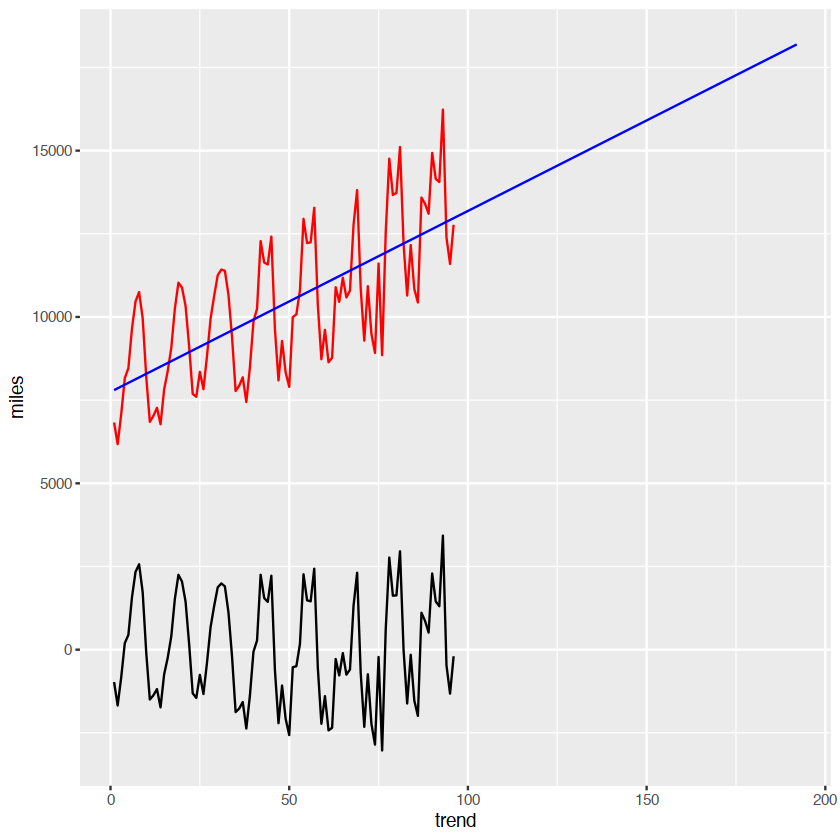

In [10]:
p <- ggplot() +
      geom_line(data=data, aes(x=trend, y=miles), color="red") + 
      geom_line(data=data, aes(x=trend, y=yhat), color="blue") +
      geom_line(data=data, aes(x=trend, y=ehat), color="black")

p

# d

In [11]:
summary(data$ehat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-3029.8 -1342.8  -199.4     0.0  1449.9  3427.3      96 

In [12]:
data2 = data[data[, "month"] >= 6&data[, "month"] <= 9,]
summary(data2$ehat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -749.8  1451.5  1800.0  1786.8  2271.2  3427.3      32 

# e

In [13]:
month.f = factor(data$month)
dummies = model.matrix(~month.f)

In [14]:
head(dummies)

,(Intercept),month.f2,month.f3,month.f4,month.f5,month.f6,month.f7,month.f8,month.f9,month.f10,month.f11,month.f12
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0


In [15]:
data3 = cbind(data, dummies)

In [16]:
head(data3)

,year,month,miles,trend,yhat,ehat,(Intercept),month.f2,month.f3,month.f4,month.f5,month.f6,month.f7,month.f8,month.f9,month.f10,month.f11,month.f12
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1963,1,6827,1,7801.578,-974.5775,1,0,0,0,0,0,0,0,0,0,0,0
2,1963,2,6178,2,7855.981,-1677.9809,1,1,0,0,0,0,0,0,0,0,0,0
3,1963,3,7084,3,7910.384,-826.3844,1,0,1,0,0,0,0,0,0,0,0,0
4,1963,4,8162,4,7964.788,197.2122,1,0,0,1,0,0,0,0,0,0,0,0
5,1963,5,8462,5,8019.191,442.8088,1,0,0,0,1,0,0,0,0,0,0,0
6,1963,6,9644,6,8073.595,1570.4054,1,0,0,0,0,1,0,0,0,0,0,0


In [17]:
model2 = lm(miles ~ trend + month.f2 + month.f3 + month.f4 + month.f5 + month.f6 + month.f7 + month.f8 + month.f9 + month.f10 + month.f11 + month.f12, data=data3)
summary(model2)


Call:
lm(formula = miles ~ trend + month.f2 + month.f3 + month.f4 + 
    month.f5 + month.f6 + month.f7 + month.f8 + month.f9 + month.f10 + 
    month.f11 + month.f12, data = data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2628.32  -359.63     9.83   367.07  1577.16 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6214.696    280.408  22.163  < 2e-16 ***
trend         52.961      2.683  19.738  < 2e-16 ***
month.f2    -513.461    361.442  -1.421 0.159182    
month.f3    1189.579    361.472   3.291 0.001467 ** 
month.f4    1240.618    361.521   3.432 0.000938 ***
month.f5    2051.283    361.591   5.673 1.99e-07 ***
month.f6    3325.322    361.681   9.194 2.67e-14 ***
month.f7    3113.612    361.790   8.606 4.01e-13 ***
month.f8    3312.526    361.919   9.153 3.23e-14 ***
month.f9    3811.190    362.069  10.526  < 2e-16 ***
month.f10   1297.980    362.238   3.583 0.000571 ***
month.f11   -188.856    362.426  -0.521 0.603694    
month.f12

In [18]:
data3$yhat = predict(model2, data3)
data3$ehat = data3$miles - data3$yhat

Warning message:
“Removed 96 row(s) containing missing values (geom_path).”


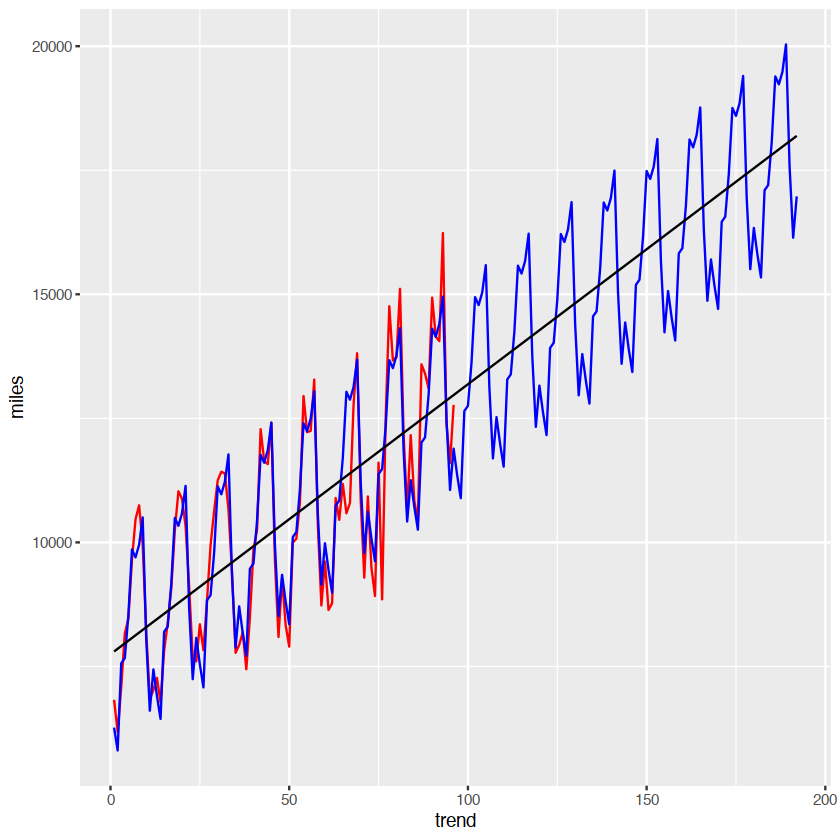

In [19]:
p <- ggplot() +
      geom_line(data=data3, aes(x=trend, y=miles), color="red") + 
      geom_line(data=data3, aes(x=trend, y=yhat), color="blue") +
      geom_line(data=data , aes(x=trend, y=yhat), color="black")

p